In [ ]:
"""%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)"""
import torch
torch.cuda.is_available()
device=torch.device("cuda:0")
device
if torch.cuda.is_available():
  device=torch.device("cuda:0")
  print("running on gpu")
else:
  device=torch.device("cpu")
  print("running on cpu")

torch.cuda.device_count()

running on gpu


1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
data = pd.read_csv("/content/Insurance cross sell.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
output_var = 'Response'

In [ ]:
import numpy as np
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[[output_var]]

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.25)

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [ ]:
concat_train_data = pd.concat([x_train,y_train],axis=1)

In [ ]:
concat_test_data = pd.concat([x_test,y_test],axis=1)

In [ ]:
x_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
169068,169069,Male,25,1,46.0,1,< 1 Year,No,22596.0,152.0,239
345315,345316,Male,35,1,30.0,0,1-2 Year,Yes,35326.0,124.0,147
210525,210526,Male,55,1,28.0,0,1-2 Year,Yes,40749.0,124.0,245
132792,132793,Female,35,1,30.0,0,1-2 Year,Yes,30096.0,157.0,43
21595,21596,Female,53,1,8.0,1,1-2 Year,No,43915.0,26.0,91
...,...,...,...,...,...,...,...,...,...,...,...
104899,104900,Male,51,1,28.0,1,1-2 Year,Yes,45397.0,26.0,83
197596,197597,Male,27,1,28.0,0,1-2 Year,Yes,34564.0,156.0,62
162043,162044,Male,35,1,7.0,1,1-2 Year,Yes,2630.0,124.0,271
282987,282988,Male,35,1,28.0,0,1-2 Year,Yes,2630.0,26.0,78


In [ ]:
y_train

,Response
169068,0
345315,0
210525,0
132792,1
21595,0
...,...
104899,0
197596,0
162043,0
282987,0


In [ ]:
x_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
136502,136503,Female,34,1,14.0,0,1-2 Year,Yes,2630.0,124.0,268
375156,375157,Male,62,1,28.0,0,1-2 Year,Yes,55278.0,26.0,197
160157,160158,Male,55,1,28.0,1,1-2 Year,No,33434.0,26.0,158
83042,83043,Female,39,1,28.0,0,1-2 Year,Yes,34957.0,124.0,295
319916,319917,Male,48,1,2.0,0,1-2 Year,Yes,22243.0,26.0,286
...,...,...,...,...,...,...,...,...,...,...,...
197503,197504,Male,40,1,28.0,0,1-2 Year,Yes,24571.0,26.0,139
26976,26977,Male,64,1,50.0,1,1-2 Year,No,26034.0,8.0,56
368341,368342,Female,20,1,26.0,0,< 1 Year,Yes,36727.0,160.0,124
182759,182760,Female,50,1,8.0,0,1-2 Year,Yes,2630.0,156.0,227


In [ ]:
y_test

,Response
136502,1
375156,0
160157,0
83042,1
319916,1
...,...
197503,0
26976,0
368341,0
182759,0


# 1. **Undertake Exploratory Data Analysis to identify patterns in the data to discover insights that could help you build better models**

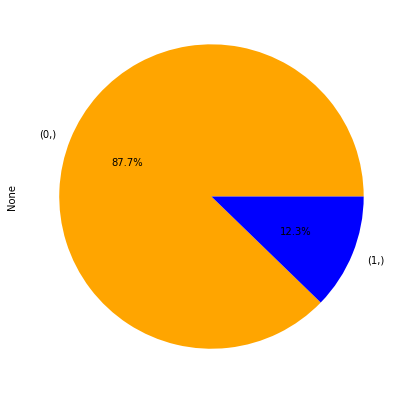

In [ ]:
y_train.value_counts().plot.pie(autopct = '%1.1f%%',colors=['Orange','Blue'], figsize = (7,7))



> Data is Imbalanced. Only 12.3% of customers are likely to buy insuarance






In [ ]:
data.isna().sum()/data.shape[0]*100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64



> >There are no missing values



Analysing Each Variable's Relationship with Target/output Variable

1. Gender

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


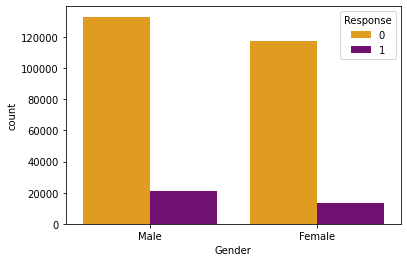

In [ ]:
import seaborn as sns
sns.countplot(x_train['Gender'], hue=y_train['Response'] ,palette=['Orange','Purple'])

2. Age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


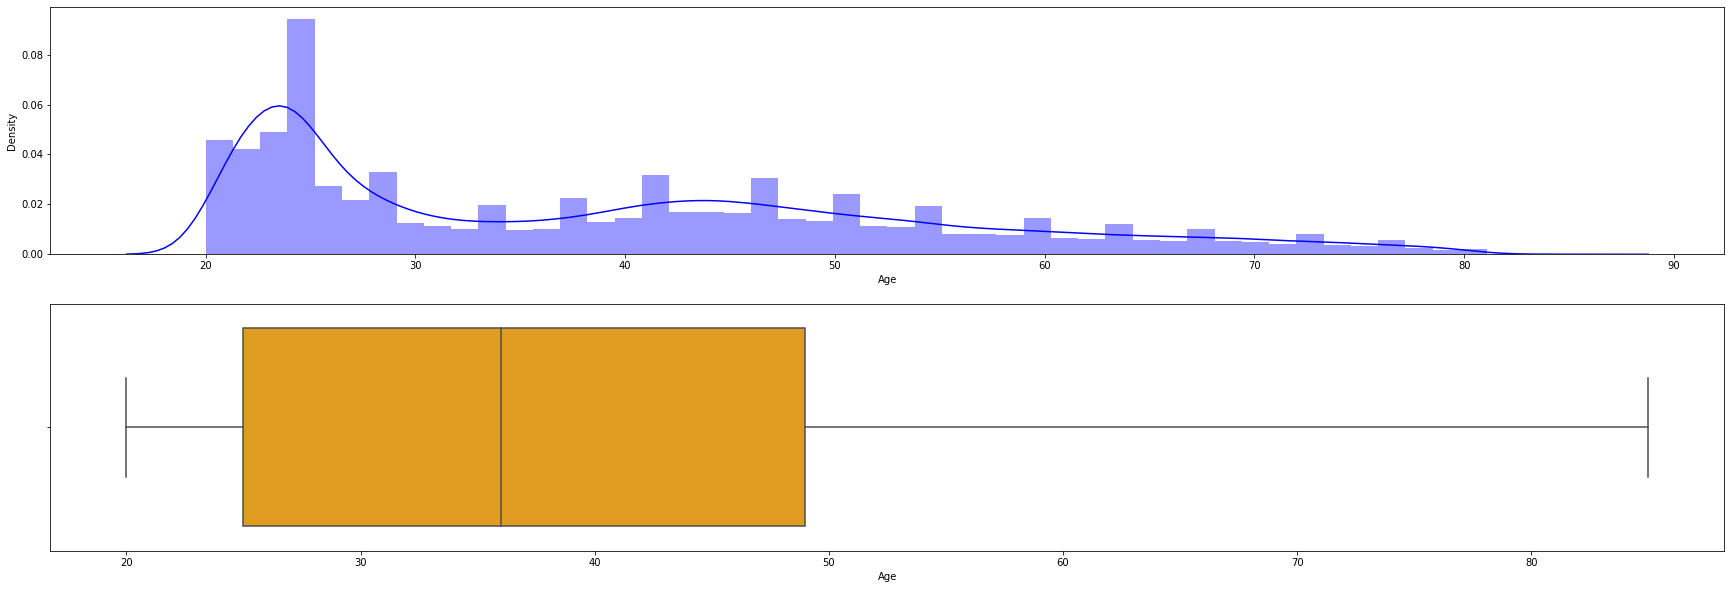

In [ ]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,10))
axx = ax.flatten()
#plt.figure(figsize=(30,10))
sns.distplot(x_train['Age'],ax=axx[0], color='Blue')
sns.boxplot(x_train['Age'],ax=axx[1],color='Orange')

Analysing Response for different Age-Groups

In [ ]:
age_grp_20_to_30 = concat_train_data[concat_train_data['Age'] <31]
age_grp_31_to_40 = concat_train_data[ concat_train_data['Age'].between(31,40)]
age_grp_41_to_50 = concat_train_data[concat_train_data['Age'].between(41,50)]
age_grp_50_to_60 = concat_train_data[ concat_train_data['Age'].between(51,60)]
age_grp_old = concat_train_data[ concat_train_data['Age'] >60]

age_grp = [age_grp_20_to_30,age_grp_31_to_40,age_grp_41_to_50,age_grp_50_to_60,age_grp_old]
age_grp_name = ['age_grp_20_to_30','age_grp_31_to_40','age_grp_41_to_50','age_grp_50_to_60','age_grp_old']
age_grp_dict = dict(zip(age_grp_name, age_grp))

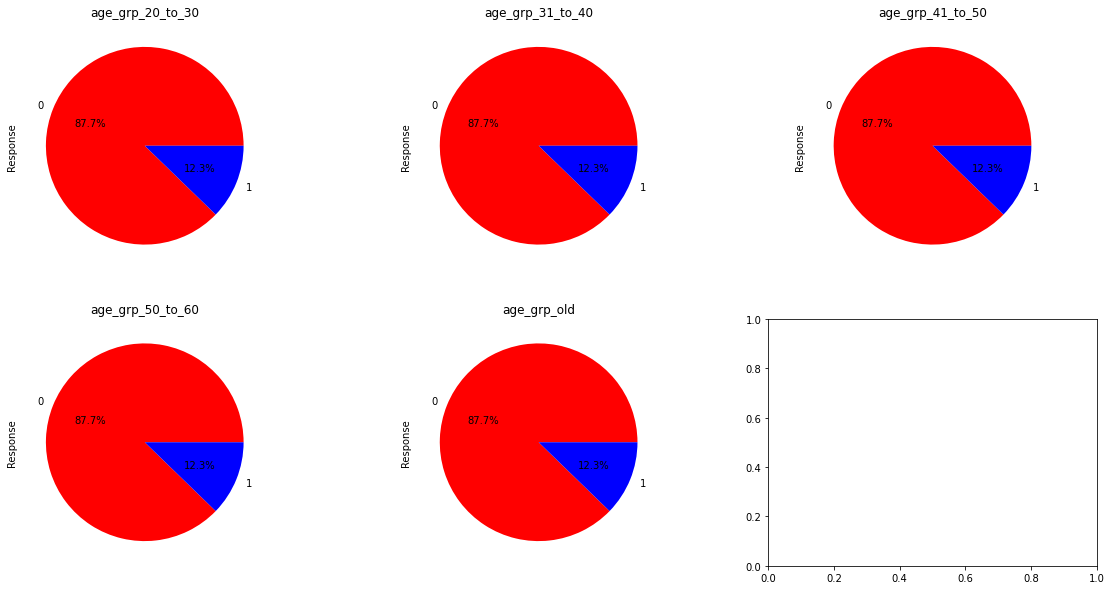

In [ ]:
f,ax = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
axx = ax.flatten()
for pos,tup in enumerate(age_grp_dict.items()):
    axx[pos].set_title(tup[0])
    data = tup[1]
    concat_train_data['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[pos],colors=['Red','Blue'])

Analysing Response with both 'Age-Groups' and 'Gender'

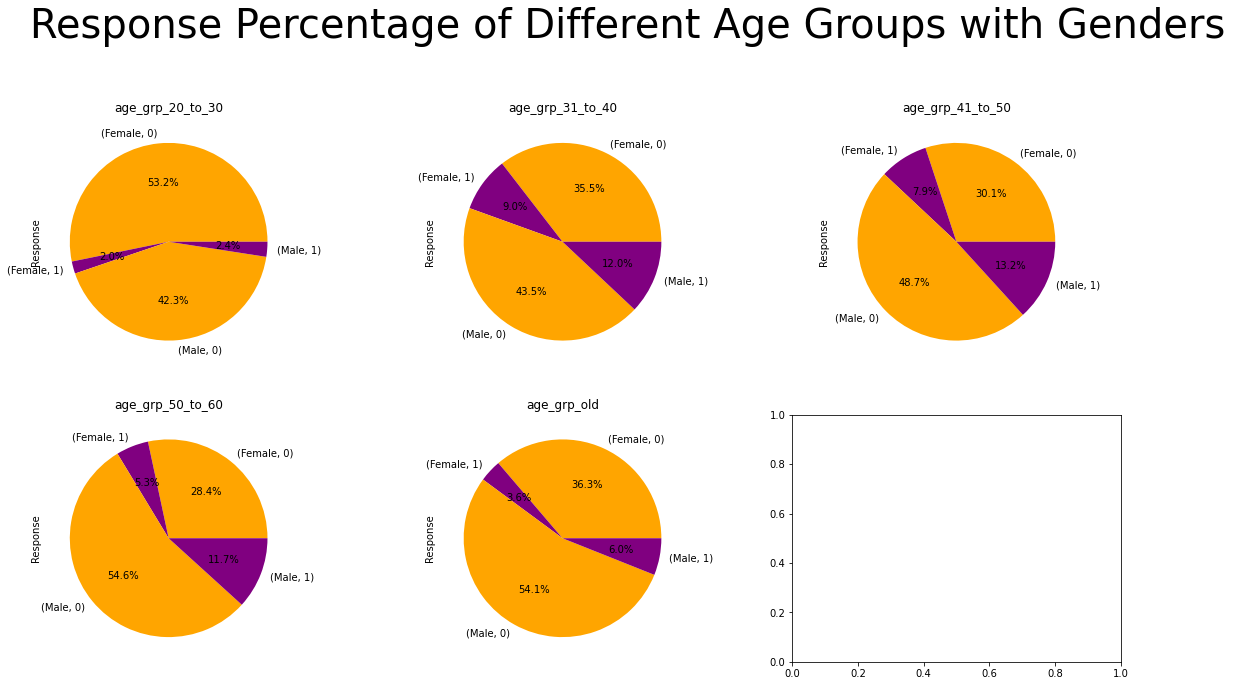

In [ ]:
f,ax = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
axx = ax.flatten()
plt.title('Response Percentage of Different Age Groups with Genders',fontsize=40,x=-0.5,y=2.5)
for pos,tup in enumerate(age_grp_dict.items()):
    axx[pos].set_title(tup[0])
    temp = tup[1]
    temp.groupby('Gender')['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[pos],colors=['Orange','Purple'])

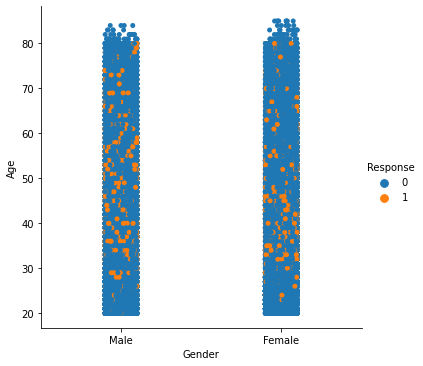

In [ ]:
sns.catplot(x = 'Gender', y="Age",hue = 'Response', data=concat_train_data)



*   Customers of age between 30 to 60 are more likely to buy insurance.

*   Customes of age between 20 to 30 are less likely to buy insurance.

*   In almost every age group, 'Male's are more likely to buy insurance.

*   Females under age 30 are very less likely to buy insurance

3. Driving_License

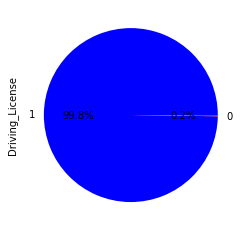

In [ ]:
x_train['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['Blue','Red'])

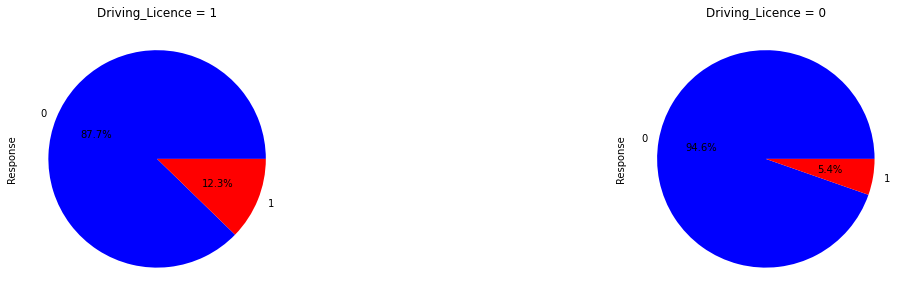

In [ ]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize = (20,5))
axx = ax.flatten()
#plt.title('Driving_License wise Response',fontsize=40,x=-0.5,y=2)
axx[0].set_title('Driving_Licence = 1')
axx[1].set_title('Driving_Licence = 0')
concat_train_data[ concat_train_data['Driving_License'] == 1]['Response'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['Blue','Red'],ax=axx[0])
concat_train_data[ concat_train_data['Driving_License'] == 0]['Response'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['Blue','Red'],ax=axx[1])

*   Very few customers don't have Driving License.
*   Customers with Driving License have higher chance of buying Insurance

4. REGION CODE

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


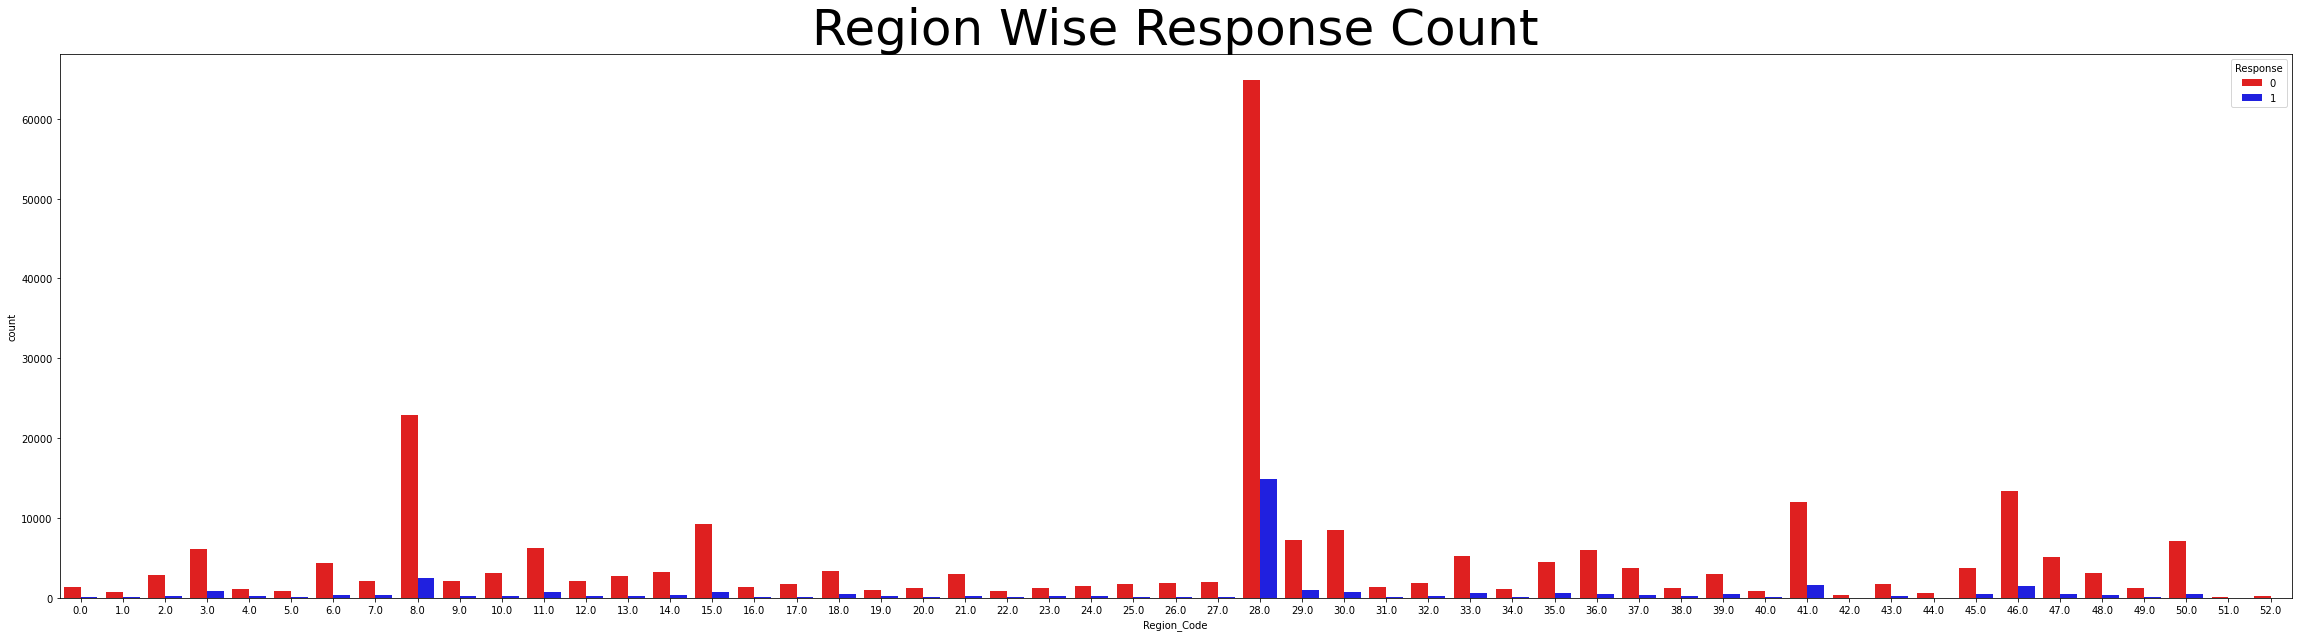

In [ ]:
plt.figure(figsize = (40,10))
plt.title('Region Wise Response Count',fontsize=50)
sns.countplot(x_train['Region_Code'], hue = y_train['Response'],palette=['Red','Blue'])

Visualizing Percentage of Response : 1 in all Region_Codes

In [ ]:
u_region = x_train['Region_Code'].unique()
region_perc = {}
for i in u_region:
    total_region = x_train[ x_train['Region_Code'] == i].shape[0]
    buy_region = x_train[ (x_train['Region_Code'] == i) & y_train['Response'] == 1].shape[0]
    region_perc[i] = (buy_region/total_region)*100

region_perc = sorted(region_perc.items(), key=lambda x: x[1], reverse=True)
region_perc = list(zip(*region_perc))

region = np.array(region_perc[0])
region_perc = np.array(region_perc[1])
region = pd.DataFrame(region)
region_perc = pd.DataFrame(region_perc)

region_res_perc = pd.concat((region,region_perc), axis=1)
region_res_perc.columns = ['Region_Code', 'Buy_Percentage']

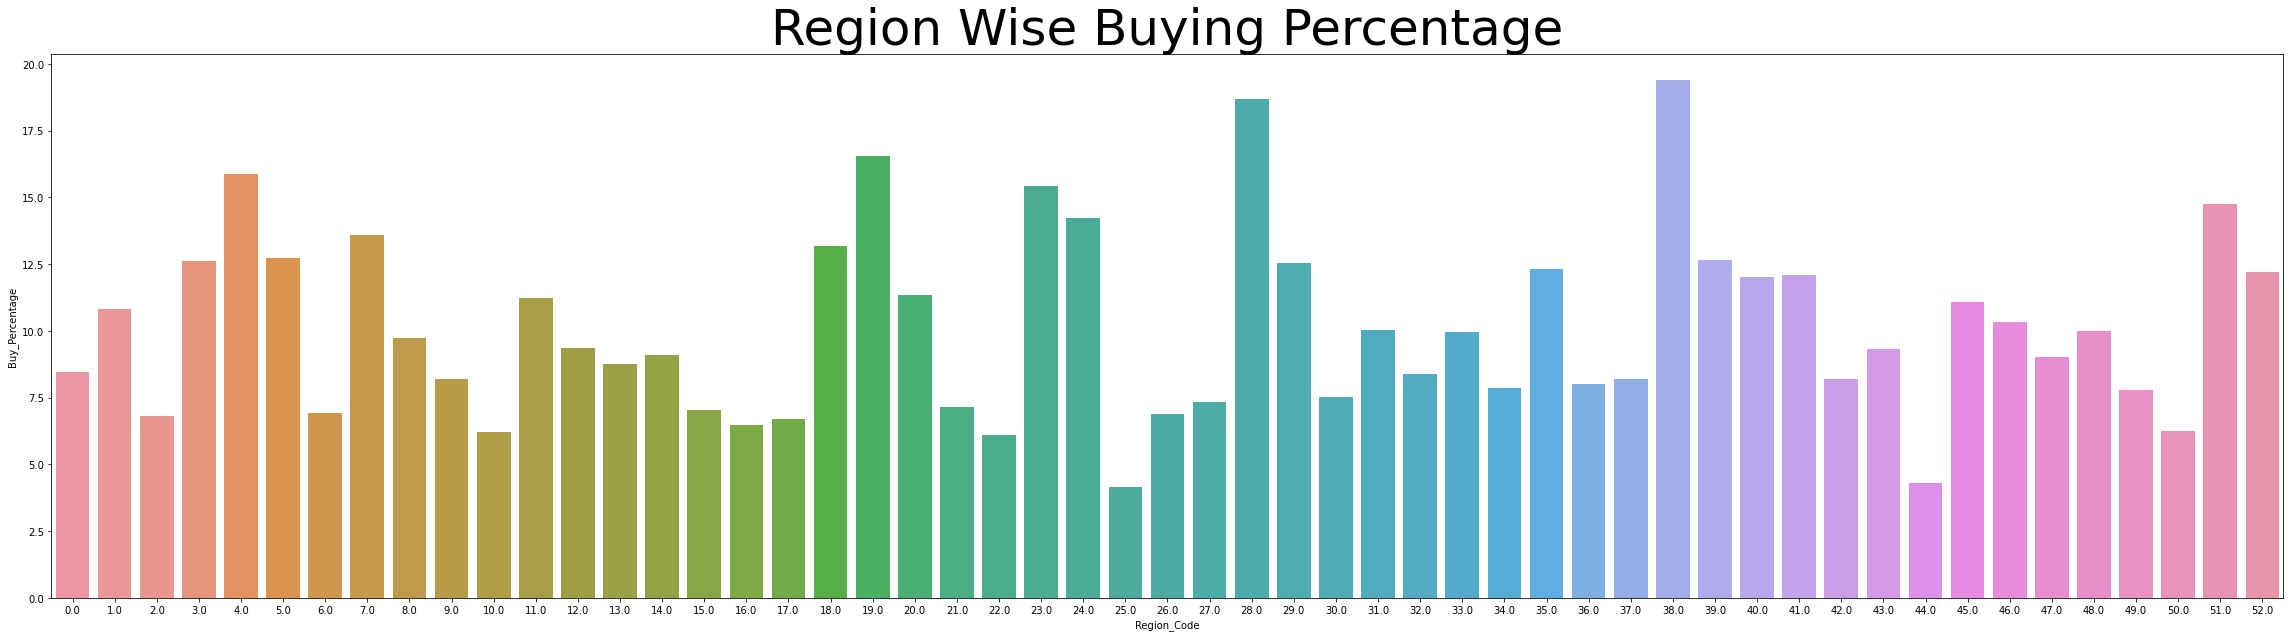

In [ ]:
plt.figure(figsize=(40,10))
plt.title('Region Wise Buying Percentage',fontsize=50)
ax = sns.barplot(x = region_res_perc['Region_Code'], y = region_res_perc['Buy_Percentage'])

*   We have most of the customers from Region_Code : 28.
*   Region_Codes: [4,19,23,24,,28,38,51] have higher percentage of buying insurance.
*   Region_Codes: 25 and 44 have lower percentage of buying insurance.

5. Previously_Insuaranced

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


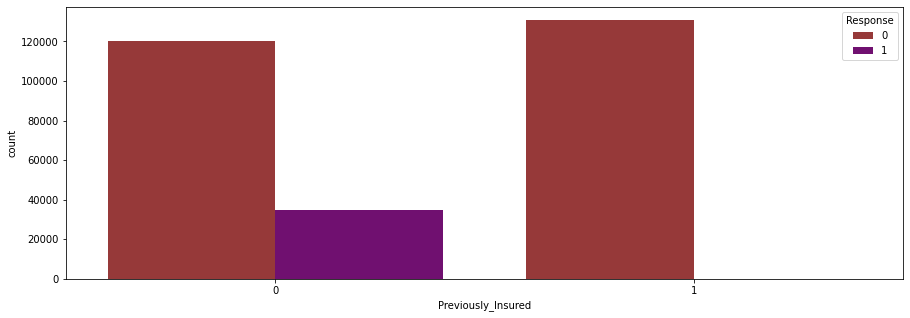

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x_train['Previously_Insured'],hue=y_train['Response'],palette=['Brown','Purple'])

*   Customers who Previously_Insured are very likely to buy Insurnce now.
*   Customers who didn't Previously_Insured have good chance of buying Insurnce.


6. Vehicle_Age

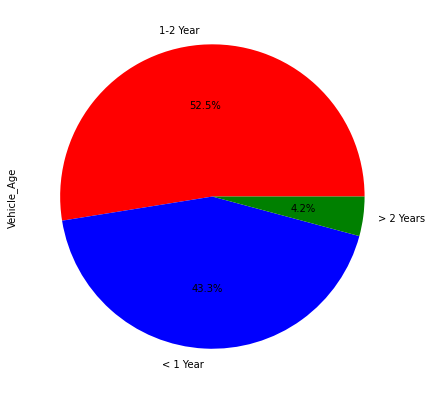

In [ ]:
plt.figure(figsize=(7,7))
x_train['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['r', 'b', 'g'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


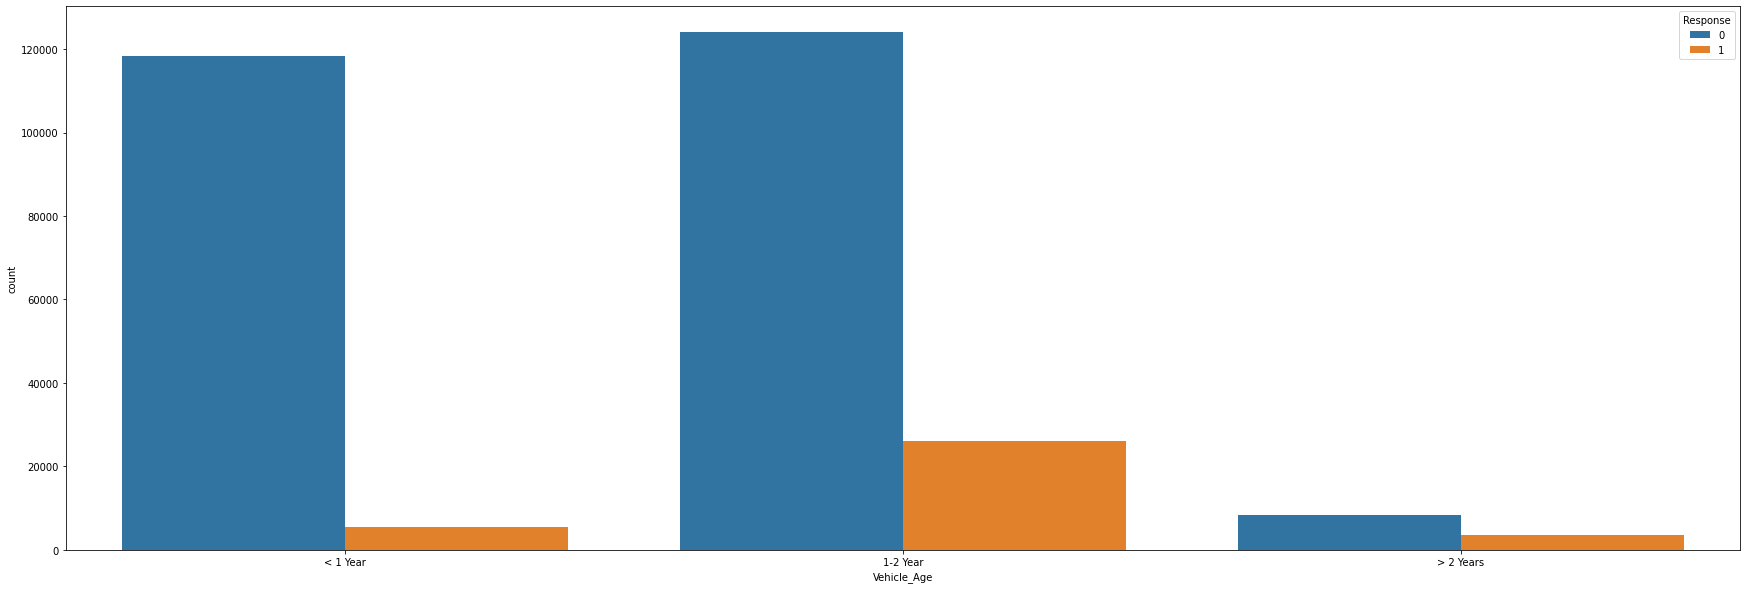

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x_train['Vehicle_Age'], hue = y_train['Response'])

In [ ]:
ls = x_train['Vehicle_Age'].unique()

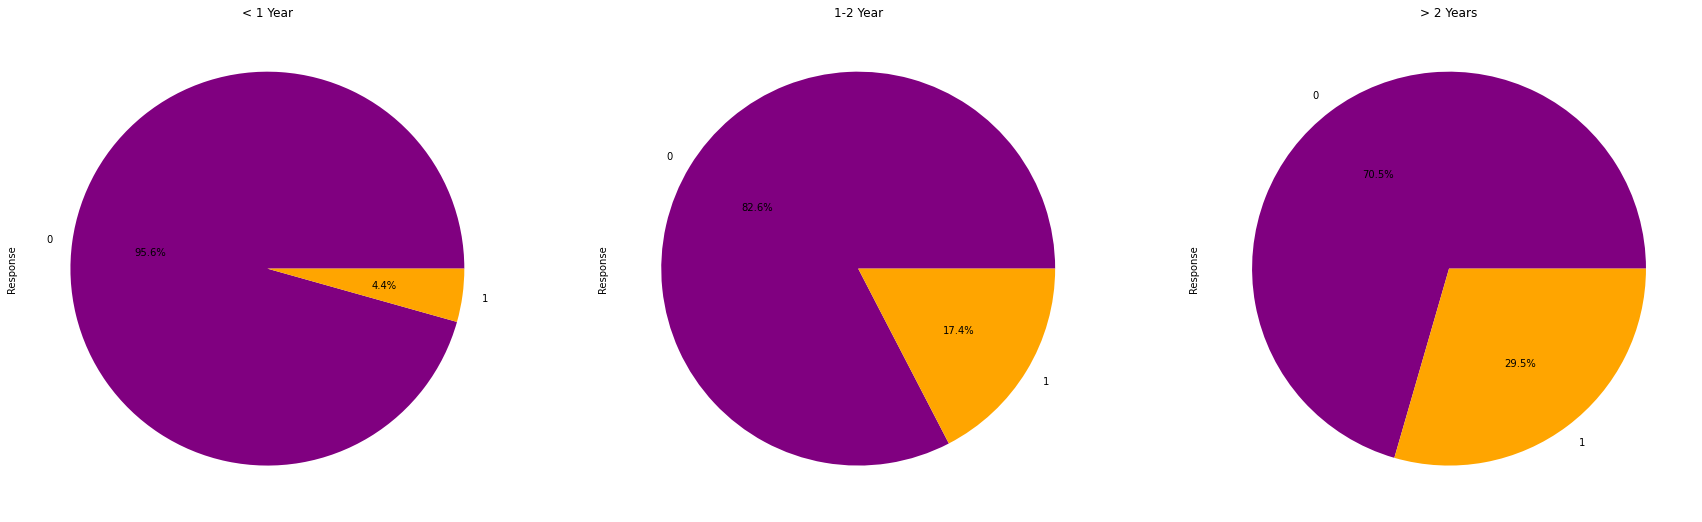

In [ ]:
f,ax = plt.subplots(nrows=1, ncols=3,figsize = (30,10))
axx = ax.flatten()
for pos,val in enumerate(ls):
    axx[pos].set_title(str(val))
    concat_train_data[x_train['Vehicle_Age'] == val]['Response'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axx[pos], colors=['Purple', 'Orange'])

*   We have half of our customers with Vehicle_Age 1-2 years.
*   We have very few customers (4.2%) with Vehicle_Age `>2 years.
*   Customers with Vehicle_Age >2years have better chance (29.4%) of buying Insurance.
*   Customers with with Vehicle_Age <1 years have very less chance of buying Insurance.

7. Vehicle_Damage

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


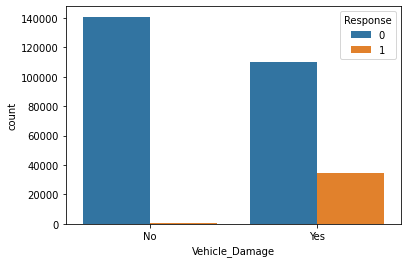

In [ ]:
sns.countplot(x_train['Vehicle_Damage'], hue = y_train['Response'])

*   We have almost same number of customes with damaged and non_damaged vehicle.
*  Customers with Vehicle_Damage are likely to buy insurance.
*  Customers with non damaged vehicle have least chance (less than 1%) of buying insurance.

8. Annual_Premium

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


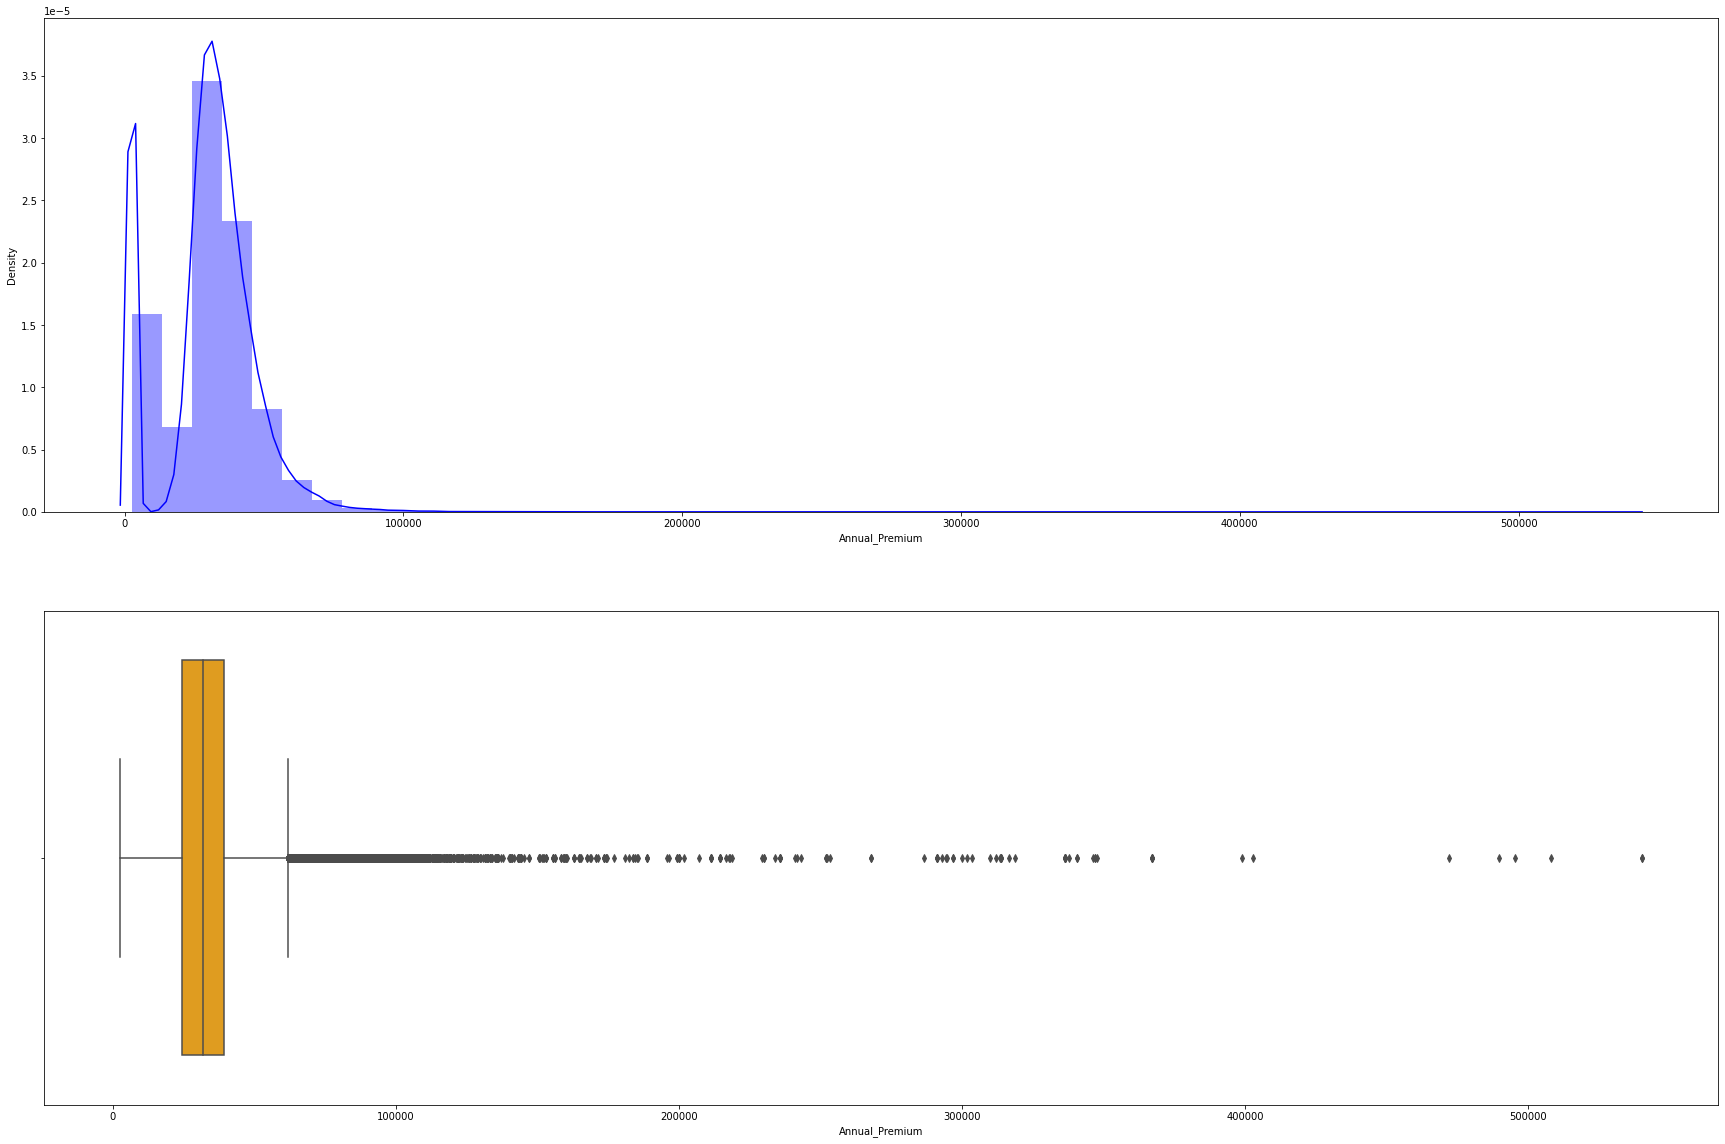

In [ ]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,20))
axx = ax.flatten()
#plt.figure(figsize=(30,10))
sns.distplot(x_train['Annual_Premium'],ax=axx[0], color='Blue')
sns.boxplot(x_train['Annual_Premium'],ax=axx[1],color='Orange')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


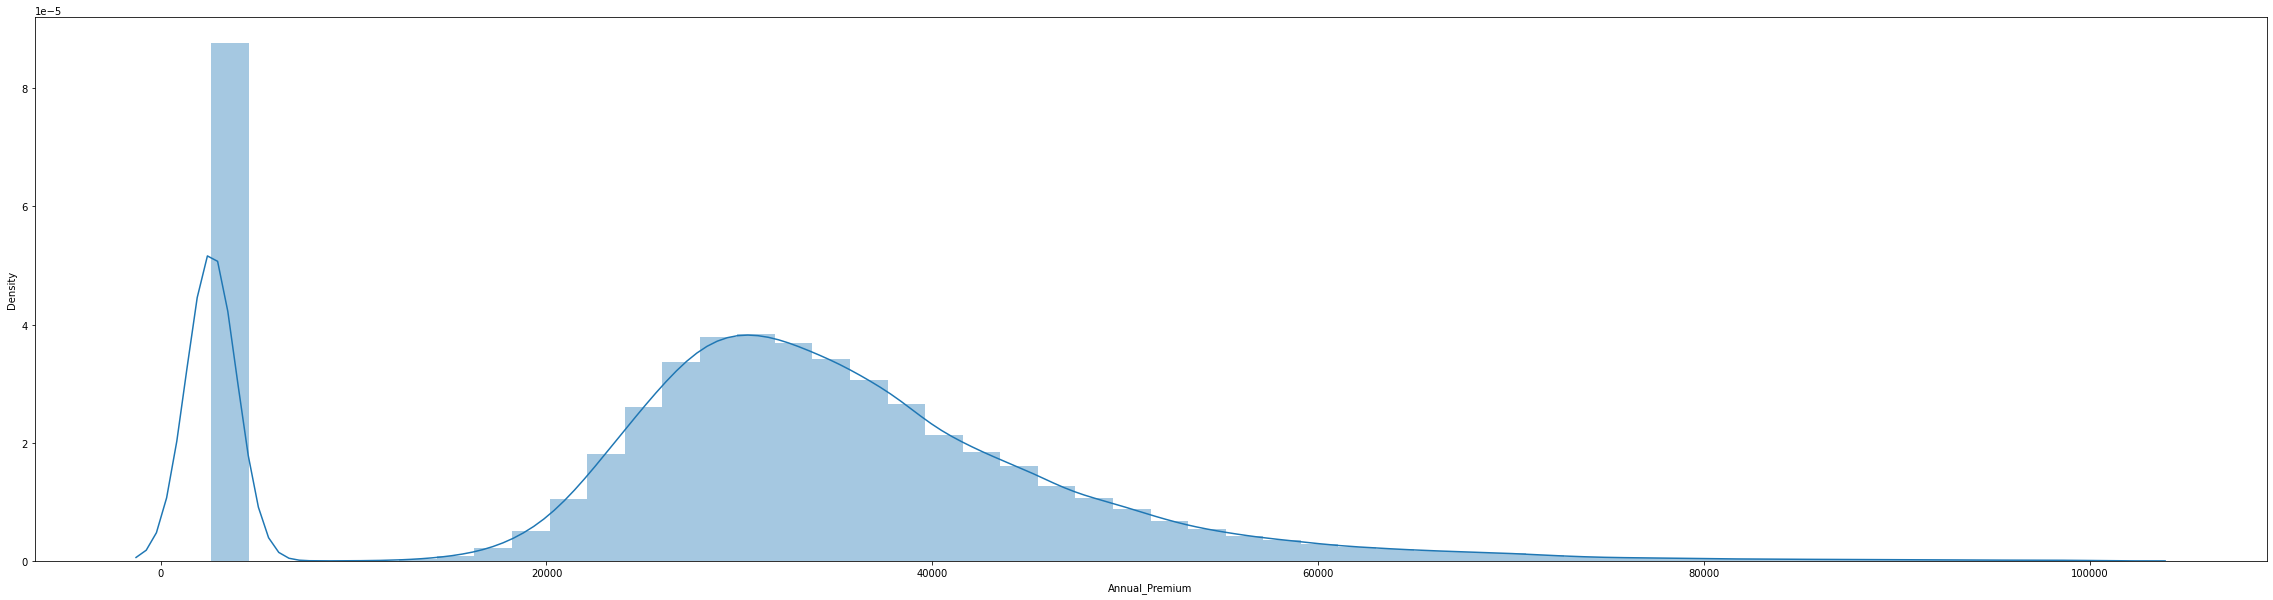

In [ ]:
plt.figure(figsize=(40,10))
sns.distplot(concat_train_data[ x_train['Annual_Premium'] < 100000]['Annual_Premium'])#.plot.hist(bins = 500, frequency=(0,10000))

In [ ]:
start = 0
step = 10000
ls = []
for _ in range(10):
    ls.append((start,step))
    start = step
    step+=10000

for tup in ls:
    count = x_train[ x_train['Annual_Premium'].between(tup[0],tup[1])].shape[0]
    percentage = x_train[ (x_train['Annual_Premium'].between(tup[0], tup[1])) & (y_train['Response'] == 1)].shape[0]/x_train[ x_train['Annual_Premium'].between(tup[0], tup[1])].shape[0]*100
    print('Number of Customers with Annual_Premium Between {} : {} and Insurance Buy Percentage:{}'.format(tup,count,percentage))

Number of Customers with Annual_Premium Between (0, 10000) : 48687 and Insurance Buy Percentage:13.15135457103539
Number of Customers with Annual_Premium Between (10000, 20000) : 4336 and Insurance Buy Percentage:7.910516605166052
Number of Customers with Annual_Premium Between (20000, 30000) : 71593 and Insurance Buy Percentage:10.006564887628679
Number of Customers with Annual_Premium Between (30000, 40000) : 93772 and Insurance Buy Percentage:12.00784882480911
Number of Customers with Annual_Premium Between (40000, 50000) : 43260 and Insurance Buy Percentage:14.214054553860379
Number of Customers with Annual_Premium Between (50000, 60000) : 15068 and Insurance Buy Percentage:15.622511282187418
Number of Customers with Annual_Premium Between (60000, 70000) : 5484 and Insurance Buy Percentage:15.007293946024799
Number of Customers with Annual_Premium Between (70000, 80000) : 1889 and Insurance Buy Percentage:14.240338803599789
Number of Customers with Annual_Premium Between (80000, 90

*  'Annual Premium' data is highlt left skewed.
*  Most of the customers have "Annual_Premium' in range (0, 10000) and (20000 to 50000)
*  In every 'Annual Premium' range, the insurance buy percentage is almost same.


9. Plolicy_Sales_Channel

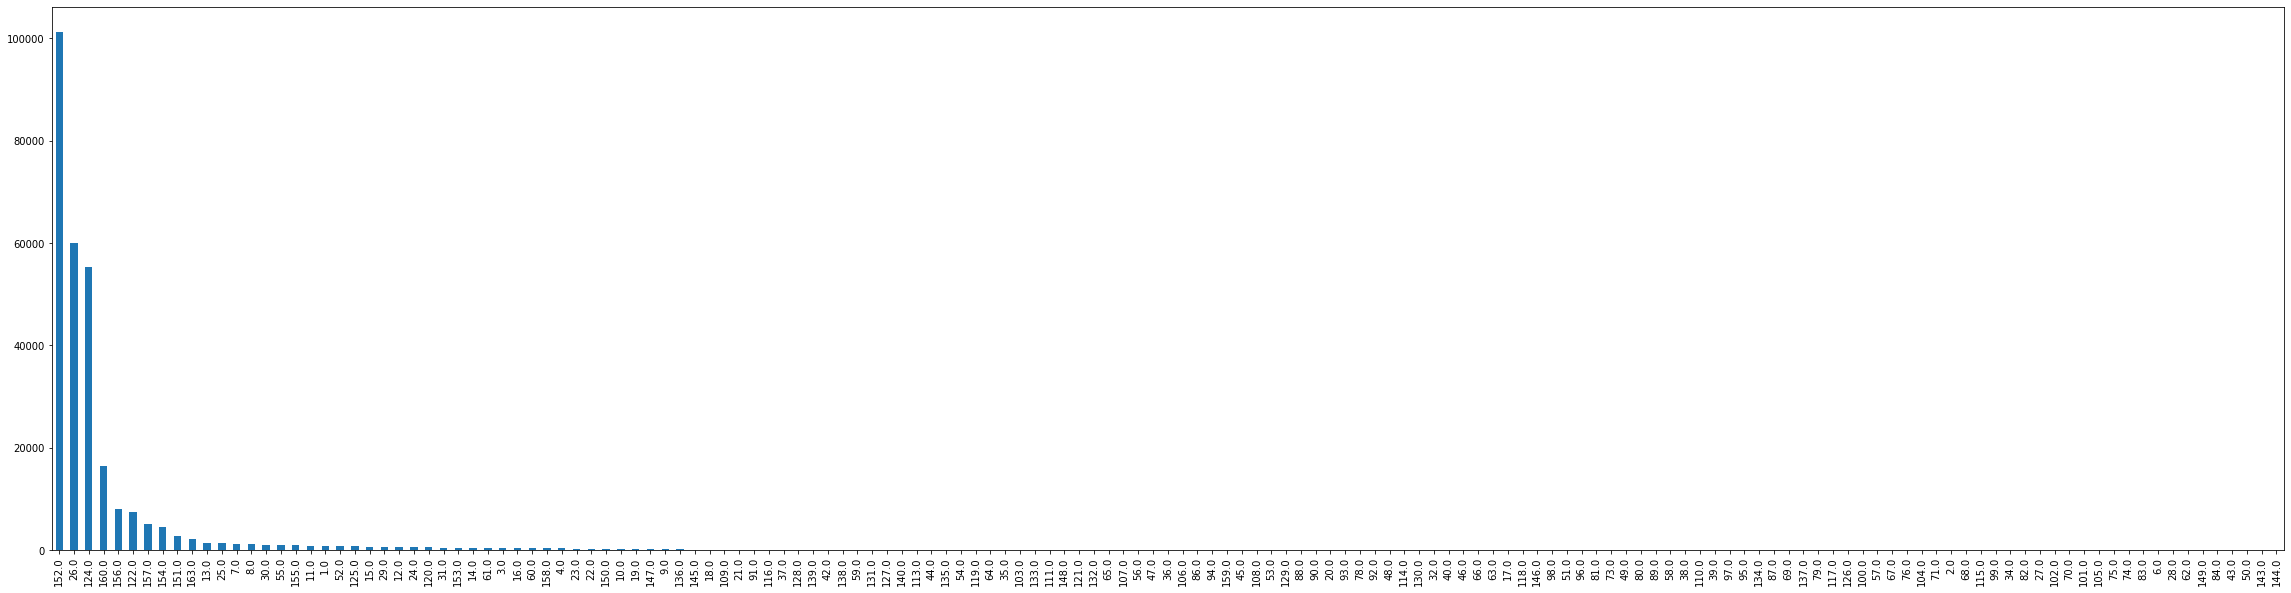

In [ ]:
plt.figure(figsize=(40,10))
x_train['Policy_Sales_Channel'].value_counts().plot.bar()

*  Policy_Sales_Channel no. 152 have higest number of customers.
*  Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.

10. Vintage

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


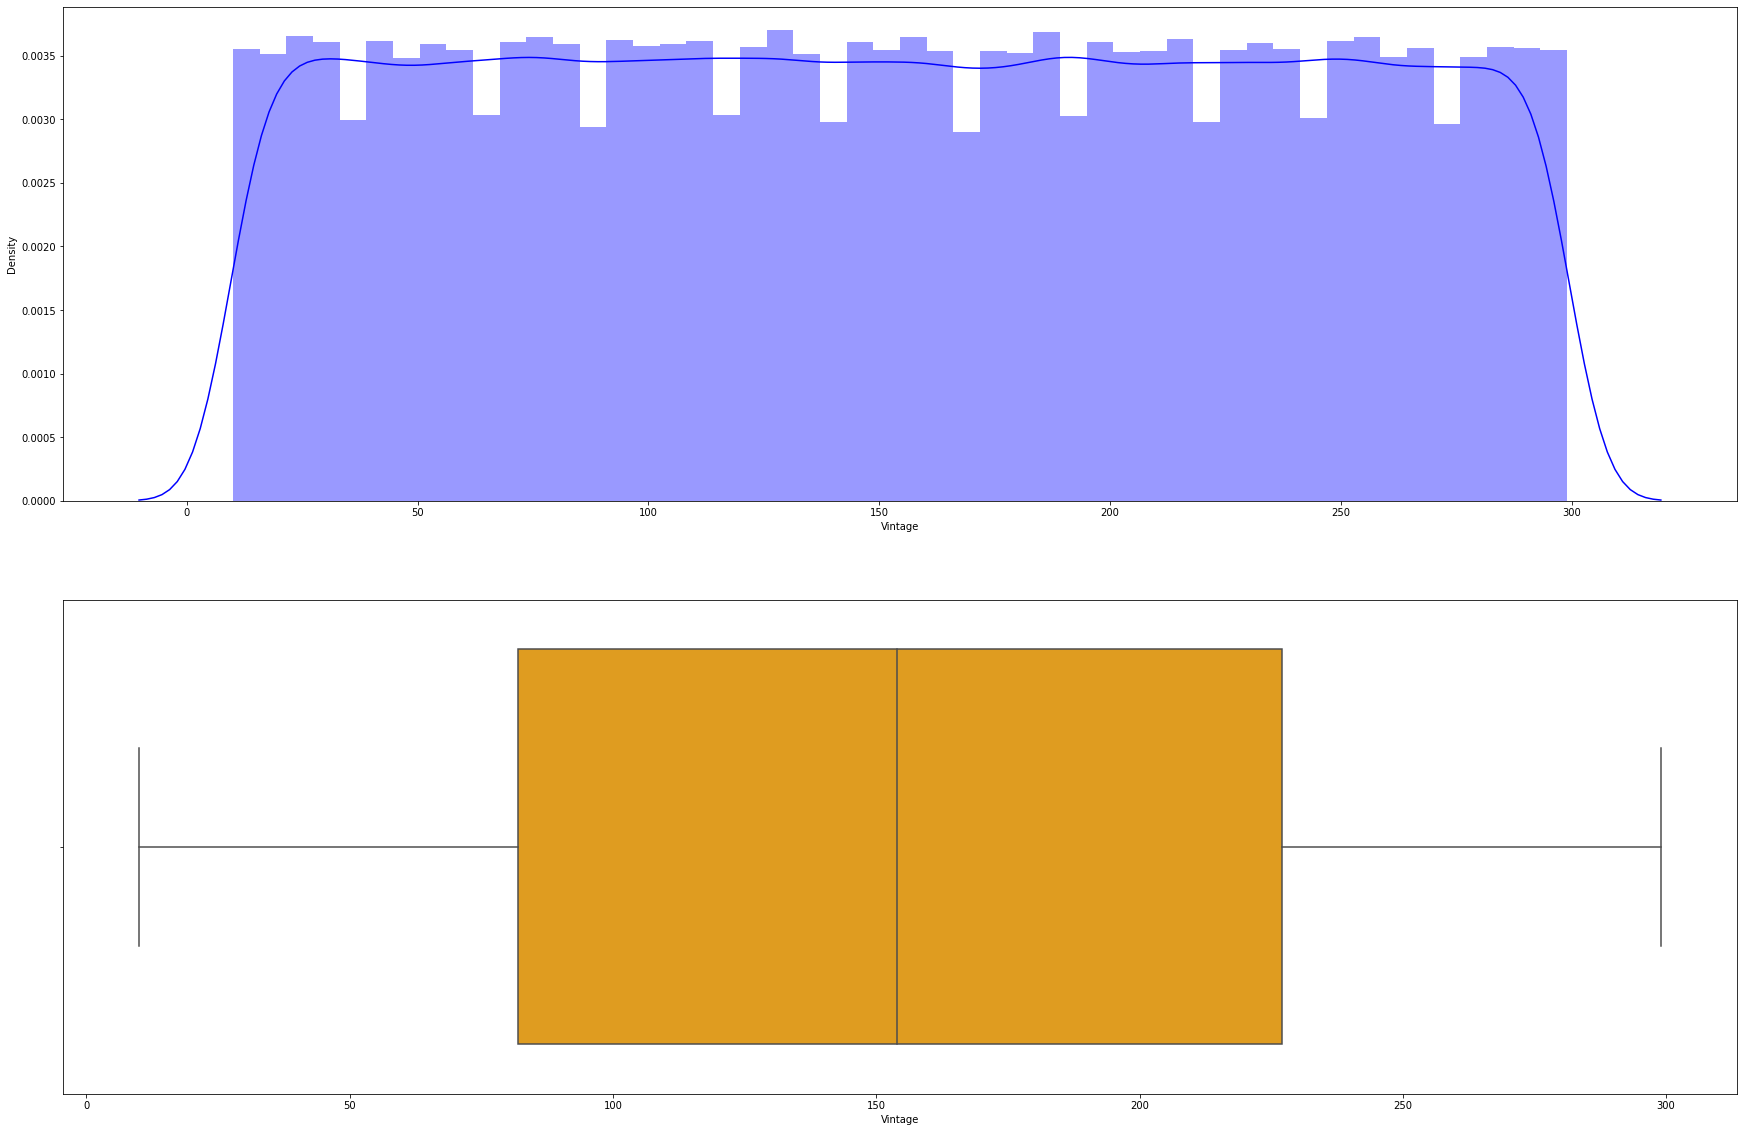

In [ ]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,20))
axx = ax.flatten()
sns.distplot(x_train['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(x_train['Vintage'],ax=axx[1],color='Orange')

Every 'Vintage' value have almost same number of customers.

Understandings:
* Customers of age between 30 to 60 are more likely to buy insurance.
* Customes of age between 20 to 30 are less likely to buy insurance.
* In almost every age group, 'Male's are more likely to buy insurance.
* Females under age 30 are very less likely ho buy insurance.
* Very few customers don't have Driving License.
* Customers with Driving License have higher chance of buying Insurance.
* We have most of the customers from Region_Code : 28.
* Region_Codes: [4,19,23,24,,28,38,51] have higher percentage of buying insurance.
* Region_Codes: 25 and 44 have lower percentage of buying insurance.
* Customers who Previously_Insured are very likely to buy Insurnce now.
* Customers who didn't Previously_Insured have good chance of buying Insurnce.
* We have half of our customers with Vehicle_Age 1-2 years.
* We have very few customers (4.2%) with Vehicle_Age >2 years.
* Customers with Vehicle_Age >2years have better chance (29.4%) of buying Insurance.
* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance.
* We have almost same number of customes with damaged and non_damaged vehicle.
* Customers with Vehicle_Damage are likely to buy insurance.
* Customers with non damaged vehicle have least chance (less than 1%) of buying insurance.
* 'Annual Premium' data is highlt left skewed.
* Most of the customers have "Annual_Premium' in range (0, 10000) and (20000 to 50000)
* In every 'Annual Premium' range, the insurance buy percentage is almost same.
* Policy_Sales_Channel no. 152 have higest number of customers.
* Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.
* Every 'Vintage' value have almost same number of customers.

Outlier Analysis:

1. Age

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


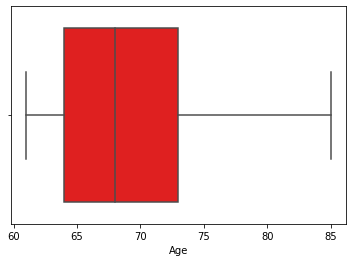

In [ ]:
sns.boxplot('Age', data=data, orient='v', color='Red')

2. Annual Premium

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


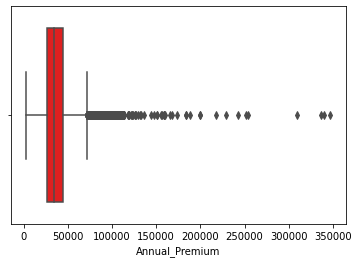

In [ ]:
sns.boxplot('Annual_Premium', data=data,orient='v', color='red')


Corretation Analysis:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
corr_check = data.copy()

col_ls = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in col_ls:
    corr_check[col] = le.fit_transform(corr_check[col])

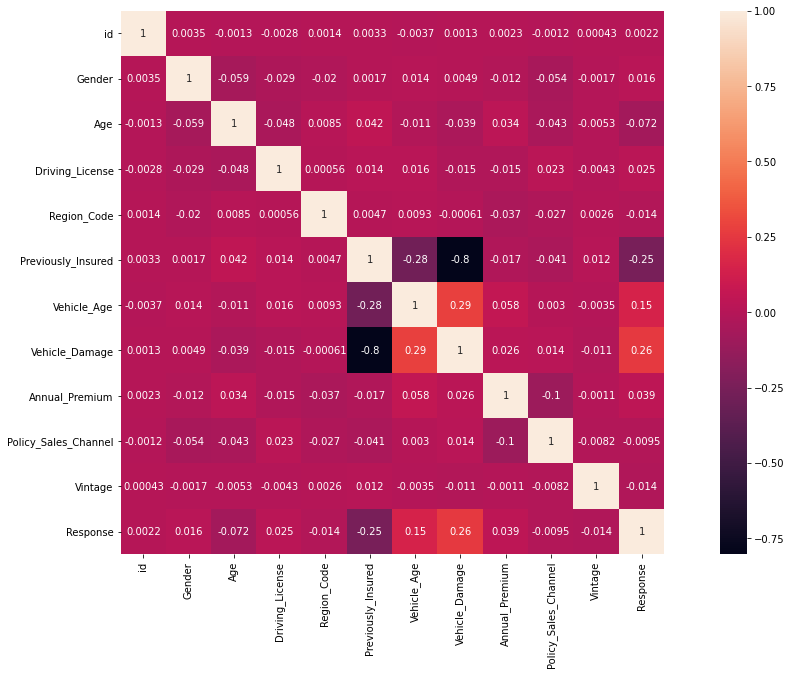

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_check.corr(), annot=True, square=True,annot_kws={'size': 10})

* 'Previously_Insured' and 'Vehicle_Damage' are highly positively corelated.
* 'Age' and 'Policy_Sales_Channel' are negatively corelated.
* 'Age' and 'Vehicle_Age' are negatively corelated.



---



# 2. Build models using the standard classification algorithms that you have studied during the course i.e. logistic regression, k-nearest neighbour, naive Bayes, decision trees, support vector machines, random forest and gradient boosted decision trees

In [ ]:
concat_train_data['Vehicle_Age']=concat_train_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
concat_train_data['Gender']=concat_train_data['Gender'].replace({'Male':1,'Female':0})
concat_train_data['Vehicle_Damage']=concat_train_data['Vehicle_Damage'].replace({'Yes':1,'No':0})

concat_test_data['Vehicle_Age']=concat_test_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
concat_test_data['Gender']=concat_test_data['Gender'].replace({'Male':1,'Female':0})
concat_test_data['Vehicle_Damage']=concat_test_data['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [ ]:
features=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [ ]:
x=concat_train_data[features]

In [ ]:
np.random.seed(37) # Set seed
X_train, X_test = train_test_split(x, test_size = 0.25)

## dont using iloc as we have projected from data
Y_train = y.loc[X_train.index.values] 
Y_test = y.loc[X_test.index.values]
X_train = x.loc[X_train.index.values, :]
X_test = x.loc[X_test.index.values, :]

In [ ]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
204796,1,51,1,41.0,0,1,1,30559.0,124.0,77
62226,1,66,1,8.0,1,1,0,2630.0,26.0,42
278891,1,28,1,28.0,0,0,1,30628.0,152.0,297
104968,0,25,1,28.0,1,0,0,26499.0,152.0,186
203129,0,38,1,41.0,0,1,1,2630.0,26.0,249
...,...,...,...,...,...,...,...,...,...,...
163192,1,57,1,46.0,1,1,0,26794.0,124.0,130
253485,0,73,1,28.0,0,1,1,29306.0,124.0,158
5312,0,46,1,28.0,0,1,1,25443.0,26.0,62
364639,0,77,1,34.0,0,1,1,48743.0,26.0,62


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

1. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

proba = lr.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
print('Logistic Regression Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
print('Logistic Regression Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     62835
           1       0.00      0.00      0.00      8623

    accuracy                           0.88     71458
   macro avg       0.44      0.50      0.47     71458
weighted avg       0.77      0.88      0.82     71458

Logistic Regression Base Accuracy : 0.879327716980604
Logistic Regression Base ROC_AUC_SCORE: 0.5932222113546538


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. K-nearest neighbour Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
proba = knn.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
print('KNN Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
print('KNN Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.88      0.97      0.92     62835
           1       0.21      0.06      0.09      8623

    accuracy                           0.86     71458
   macro avg       0.55      0.51      0.51     71458
weighted avg       0.80      0.86      0.82     71458

KNN Base Accuracy : 0.8606314198550198
KNN Base ROC_AUC_SCORE: 0.5973507473674144


3. Naive bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)
proba = nb.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
print('Naive Bayes Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
print('Naive Bayes Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.88      0.90     62835
           1       0.30      0.36      0.33      8623

    accuracy                           0.82     71458
   macro avg       0.60      0.62      0.61     71458
weighted avg       0.84      0.82      0.83     71458

Naive Bayes Base Accuracy : 0.8185507570880797
Naive Bayes Base ROC_AUC_SCORE: 0.8163922368797205


4. Decision Trees Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
proba = dtree.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
print('Decision Trees Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
print('Decision Trees Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     62835
           1       0.30      0.32      0.31      8623

    accuracy                           0.83     71458
   macro avg       0.60      0.61      0.60     71458
weighted avg       0.83      0.83      0.83     71458

Decision Trees Base Accuracy : 0.8259117243695597
Decision Trees Base ROC_AUC_SCORE: 0.6073689699079801


5. Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
#proba = svm.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
#print('SVM Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
#print('SVM Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     62835
           1       0.00      0.00      0.00      8623

    accuracy                           0.88     71458
   macro avg       0.44      0.50      0.47     71458
weighted avg       0.77      0.88      0.82     71458



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train,Y_train)
Y_pred = rfm.predict(X_test)
proba = rfm.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
print('Random Forest Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
print('Random Forest Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     62835
           1       0.36      0.12      0.17      8623

    accuracy                           0.87     71458
   macro avg       0.62      0.54      0.55     71458
weighted avg       0.82      0.87      0.84     71458

Random Forest Base Accuracy : 0.8679923871364997
Random Forest Base ROC_AUC_SCORE: 0.8332263331560348


7. Gradient boosted Decision Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)
proba = gb.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred))
print('Gradient boosted Base Accuracy : {}'.format(accuracy_score(Y_test,Y_pred)))
print('Gradient boosted Base ROC_AUC_SCORE: {}'.format(roc_auc_score(Y_test,proba)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     62835
           1       0.00      0.00      0.00      8623

    accuracy                           0.88     71458
   macro avg       0.44      0.50      0.47     71458
weighted avg       0.77      0.88      0.82     71458

Gradient boosted Base Accuracy : 0.879327716980604
Gradient boosted Base ROC_AUC_SCORE: 0.8316874873189273


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



# 3. Noting the skew in the distribution, study methods for addressing the skew using over or under-sampling and SMOTE and apply them to the problem

In [ ]:
concat_train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
169068,169069,1,25,1,46.0,1,0,0,22596.0,152.0,239,0
345315,345316,1,35,1,30.0,0,1,1,35326.0,124.0,147,0
210525,210526,1,55,1,28.0,0,1,1,40749.0,124.0,245,0
132792,132793,0,35,1,30.0,0,1,1,30096.0,157.0,43,1
21595,21596,0,53,1,8.0,1,1,0,43915.0,26.0,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104899,104900,1,51,1,28.0,1,1,1,45397.0,26.0,83,0
197596,197597,1,27,1,28.0,0,1,1,34564.0,156.0,62,0
162043,162044,1,35,1,7.0,1,1,1,2630.0,124.0,271,0
282987,282988,1,35,1,28.0,0,1,1,2630.0,26.0,78,0


In [ ]:
def upsample(df, u_feature, n_upsampling):
    ones = df.copy()
    for n in range(n_upsampling):
        if u_feature == 'Annual_Premium':
            df[u_feature] = ones[u_feature].apply(lambda x: x + random.randint(-1,1)* x *0.05) # change Annual_premiun in the range of 5%
        else:
            df[u_feature] = ones[u_feature].apply(lambda x: x + random.randint(-5,5)) # change Age in the range of 5 years
                
        if n == 0:
            df_new = df.copy()
        else:
            df_new = pd.concat([df_new, df])
    return df_new

In [ ]:
df_train_mod = concat_train_data.copy()
df_train_mod['old_damaged'] = df_train_mod.apply(lambda x: pow(2,x.Vehicle_Age)+pow(2,x.Vehicle_Damage), axis =1)

In [ ]:
import random
SEED = 1970
random.seed(SEED)
# we shall preserve validation set without augmentation/over-sampling
df_temp, X_valid, _, y_valid = train_test_split(df_train_mod, df_train_mod['Response'], train_size=0.8, random_state = SEED)
X_valid = X_valid.drop(columns = ['Response'])

# upsampling Positive Response class only
df_train_up_a = upsample(df_temp.loc[df_temp['Response'] == 1], 'Age', 1)
df_train_up_v = upsample(df_temp.loc[df_temp['Response'] == 1], 'Vintage', 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_train_mod.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,old_damaged
169068,169069,1,25,1,46.0,1,0,0,22596.0,152.0,239,0,2.0
345315,345316,1,35,1,30.0,0,1,1,35326.0,124.0,147,0,4.0
210525,210526,1,55,1,28.0,0,1,1,40749.0,124.0,245,0,4.0
132792,132793,0,35,1,30.0,0,1,1,30096.0,157.0,43,1,4.0
21595,21596,0,53,1,8.0,1,1,0,43915.0,26.0,91,0,3.0


In [ ]:
df_ext = pd.concat([df_train_mod,df_train_up_a])
df_ext = pd.concat([df_ext,df_train_up_v])
train_X = df_ext.drop(columns = ['Response'])
train_Y = df_ext.Response
print('Train set target class count with over-sampling:')
print(train_Y.value_counts())
print('Validation set target class count: ')
print(y_valid.value_counts())
train_X.head()

Train set target class count with over-sampling:
0    250798
1     90905
Name: Response, dtype: int64
Validation set target class count: 
0    50070
1     7097
Name: Response, dtype: int64


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,old_damaged
169068,169069,1,25,1,46.0,1,0,0,22596.0,152.0,239,2.0
345315,345316,1,35,1,30.0,0,1,1,35326.0,124.0,147,4.0
210525,210526,1,55,1,28.0,0,1,1,40749.0,124.0,245,4.0
132792,132793,0,35,1,30.0,0,1,1,30096.0,157.0,43,4.0
21595,21596,0,53,1,8.0,1,1,0,43915.0,26.0,91,3.0


In [ ]:
_

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,old_damaged
169068,169069,1,25,1,46.0,1,0,0,22596.0,152.0,239,2.0
345315,345316,1,35,1,30.0,0,1,1,35326.0,124.0,147,4.0
210525,210526,1,55,1,28.0,0,1,1,40749.0,124.0,245,4.0
132792,132793,0,35,1,30.0,0,1,1,30096.0,157.0,43,4.0
21595,21596,0,53,1,8.0,1,1,0,43915.0,26.0,91,3.0




---



# 4. Use methods discussed in class for hyperparameter tuning of the models

Now we are going to check how the models work with the same parameters as baseline will predict using upsampled data with new features.

1. Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_X,train_Y)
Y_pred = lr.predict(X_valid)
proba = lr.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, Y_pred))
print('Logistic Regression After tuning Accuracy : {}'.format(accuracy_score(y_valid,Y_pred)))
print('Logistic Regression After tuning ROC_AUC_SCORE: {}'.format(roc_auc_score(y_valid,proba)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     50070
           1       0.31      0.36      0.34      7097

    accuracy                           0.82     57167
   macro avg       0.61      0.63      0.62     57167
weighted avg       0.83      0.82      0.83     57167

Logistic Regression After tuning Accuracy : 0.822222610946875
Logistic Regression After tuning ROC_AUC_SCORE: 0.8087978675704374


2.  k-nearest neighbour

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
Y_pred = knn.predict(X_valid)
proba = knn.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, Y_pred))
print('KNN After tuning Accuracy : {}'.format(accuracy_score(y_valid,Y_pred)))
print('KNN After tuning  ROC_AUC_SCORE: {}'.format(roc_auc_score(y_valid,proba)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     50070
           1       0.18      0.28      0.22      7097

    accuracy                           0.75     57167
   macro avg       0.53      0.55      0.53     57167
weighted avg       0.80      0.75      0.77     57167

KNN After tuning Accuracy : 0.7484387846135008
KNN After tuning  ROC_AUC_SCORE: 0.7624193143830004


3. Naive Bayes Model

In [ ]:
nb = GaussianNB()
nb.fit(train_X,train_Y)
Y_pred = nb.predict(X_valid)
proba = nb.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, Y_pred))
print('Naive Bayes After tuning  Accuracy : {}'.format(accuracy_score(y_valid,Y_pred)))
print('Naive Bayes After tuning  ROC_AUC_SCORE: {}'.format(roc_auc_score(y_valid,proba)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     50070
           1       0.27      0.26      0.26      7097

    accuracy                           0.82     57167
   macro avg       0.58      0.58      0.58     57167
weighted avg       0.82      0.82      0.82     57167

Naive Bayes After tuning  Accuracy : 0.8236919901341683
Naive Bayes After tuning  ROC_AUC_SCORE: 0.7058074142164055


4. Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X,train_Y)
Y_pred = dtree.predict(X_valid)
proba = dtree.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, Y_pred))
print('Decision Trees After Tuning Accuracy : {}'.format(accuracy_score(y_valid,Y_pred)))
print('Decision Trees After Tuning ROC_AUC_SCORE: {}'.format(roc_auc_score(y_valid,proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50070
           1       1.00      1.00      1.00      7097

    accuracy                           1.00     57167
   macro avg       1.00      1.00      1.00     57167
weighted avg       1.00      1.00      1.00     57167

Decision Trees After Tuning Accuracy : 1.0
Decision Trees After Tuning ROC_AUC_SCORE: 1.0


5. Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(train_X, train_Y)
Y_pred = svm.predict(X_valid)
print(classification_report(y_valid, Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     50070
           1       0.00      0.00      0.00      7097

    accuracy                           0.88     57167
   macro avg       0.44      0.50      0.47     57167
weighted avg       0.77      0.88      0.82     57167



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Random Forest Model

In [ ]:
rfm = RandomForestClassifier()
rfm.fit(train_X,train_Y)
Y_pred = rfm.predict(X_valid)
proba = rfm.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, Y_pred))
print('Random Forest After Tuning Accuracy : {}'.format(accuracy_score(y_valid,Y_pred)))
print('Random Forest After Tuning ROC_AUC_SCORE: {}'.format(roc_auc_score(y_valid,proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50070
           1       1.00      1.00      1.00      7097

    accuracy                           1.00     57167
   macro avg       1.00      1.00      1.00     57167
weighted avg       1.00      1.00      1.00     57167

Random Forest After Tuning Accuracy : 1.0
Random Forest After Tuning ROC_AUC_SCORE: 1.0


7. Gradient Boosted Decision Trees

In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(train_X, train_Y)
Y_pred = gb.predict(X_valid)
proba = gb.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, Y_pred))
print('Gradient boosted After Tuning Accuracy : {}'.format(accuracy_score(y_valid,Y_pred)))
print('Gradient boosted Base ROC_AUC_SCORE: {}'.format(roc_auc_score(y_valid,proba)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     50070
           1       0.00      0.00      0.00      7097

    accuracy                           0.88     57167
   macro avg       0.44      0.50      0.47     57167
weighted avg       0.77      0.88      0.82     57167

Gradient boosted After Tuning Accuracy : 0.8758549512830829
Gradient boosted Base ROC_AUC_SCORE: 0.8206411657749884


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**We will now tune the hyperparameters**

1. Logistic Regression

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

from sklearn.model_selection import GridSearchCV
lr_grid = GridSearchCV(estimator=lr, param_grid = grid, cv = 3, verbose=True, n_jobs=-1,scoring='accuracy',error_score=0)
best_lr = lr_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr_grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
#print("Best Parameters:",rf_grid.best_params_)
print("Best Estimator:",lr_grid.best_estimator_)
print("Accuracy Score:",lr_grid.score(X_test,Y_test))

Best Estimator: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score: 0.879327716980604


2. K- Nearest Neighbour

In [ ]:
leaf_size = list(range(1,30))
n_neighbors = list(range(1,10))
p=[1,2]

parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_grid = GridSearchCV(knn, param_grid=parameters, cv=2,verbose=True,n_jobs=-1)
knn_grid.fit(X_train,Y_train)
knn_grid.best_params_

Fitting 2 folds for each of 522 candidates, totalling 1044 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 1044 out of 1044 | elapsed: 52.9min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

3. Naive Bayes Model

In [ ]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
nb_grid = GridSearchCV(estimator=nb,param_grid=parameters, cv = 2, verbose=True, n_jobs=-1,scoring='accuracy')
nb_grid.fit(X_train,Y_train)
nb_grid.best_params_

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.4s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

4. Decision Tree Model

In [ ]:
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

params = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
dt_grid = GridSearchCV(estimator=dtree,param_grid = params, cv = 2, verbose=True, n_jobs=-1,scoring='accuracy',error_score=0)
dt_grid.fit(X_train,Y_train)
dt_grid.best_params_

Fitting 2 folds for each of 600 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.9min finished


GridSearchCV(cv=2, error_score=0,
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

5. Support Vector Machines

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_iter'] = [1,10,50,100]
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['C']: [0.1, 1, 10, 100, 1000]

search = GridSearchCV(sv, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

search.fit(X_train, Y_train)
search.best_params_
#print("Best Parameters:",rf_grid.best_params_)
print("Best Estimator:",search.best_estimator_)
print("Accuracy Score:",search.score(X_test,Y_test))

6. Random Forest Model

In [ ]:
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

params = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
rf_grid = GridSearchCV(estimator=rfm,param_grid = params, cv = 2, verbose=True, n_jobs=-1,scoring='accuracy')
rf_grid.fit(X_train,Y_train)
print("Best Parameters:",rf_grid.best_params_)
print("Best Estimator:",rf_grid.best_estimator_)
print("Accuracy Score:",rf_grid.score(X_test,Y_test))

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy Score: 0.8779967288534369


7. Gradient Boosted Decision Trees

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 100,5)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4,6]
max_features = ['auto']
criterion=['friedman_mse']

parameters = {
               'criterion':criterion,
               
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
gb_grid = GridSearchCV(gb, param_grid=parameters, cv=2,verbose=True,n_jobs=-1)
gb_grid.fit(X_train,Y_train)

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.4s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

# 5. Using area under ROC curve to select the best performing model

In [ ]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()
    #need to be executed

1. Logistic Regression

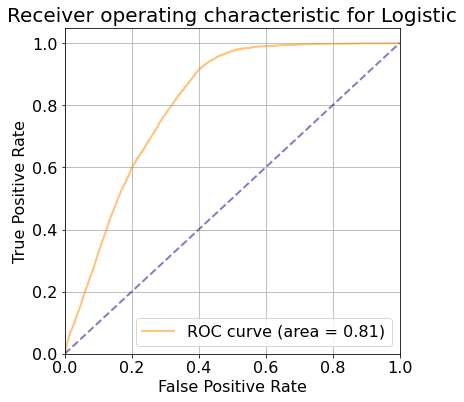

In [ ]:
import sklearn
from sklearn.metrics import auc, roc_curve
lr_preds_u = lr.predict_proba(X_valid)
lr_score_u = roc_auc_score(y_valid, lr_preds_u[:,1])
lr_class_u = lr.predict(X_valid)

(fpr, tpr, thresholds) = roc_curve(y_valid, lr_preds_u[:,1])
plot_ROC(fpr, tpr,'Logistic')

In [ ]:
!pip install scikit-plot

ROC AUC score for Logistic model with over-sampling: 0.8088
F1 score: 0.3374


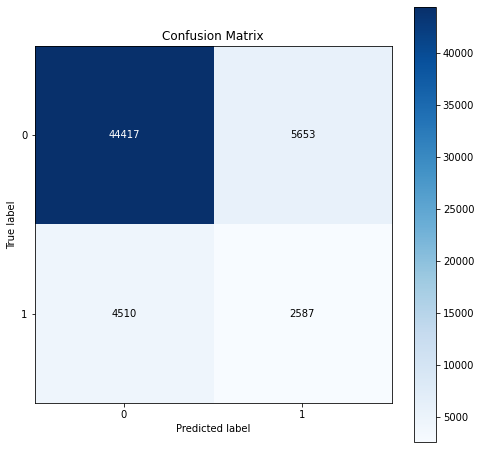

In [ ]:
import scikitplot as skplt
print('ROC AUC score for Logistic model with over-sampling: %.4f'%lr_score_u)
print('F1 score: %0.4f'%f1_score(y_valid, lr_class_u))
skplt.metrics.plot_confusion_matrix(y_valid, lr_class_u,
        figsize=(8,8))

Now we got much better True Positives, and quite acceptable AUC and f1 scores

2. k- Nearest Neighbour

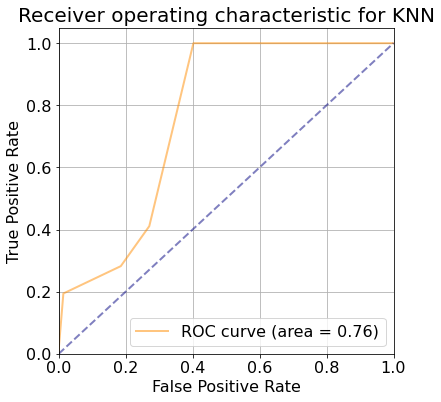

In [ ]:
knn_preds_u = knn.predict_proba(X_valid)
knn_score_u = roc_auc_score(y_valid, knn_preds_u[:,1])
knn_class_u = knn.predict(X_valid)

(fpr, tpr, thresholds) = roc_curve(y_valid, knn_preds_u[:,1])
plot_ROC(fpr, tpr,'KNN')

ROC AUC score for KNN with over-sampling: 0.7624
F1 score: 0.2179


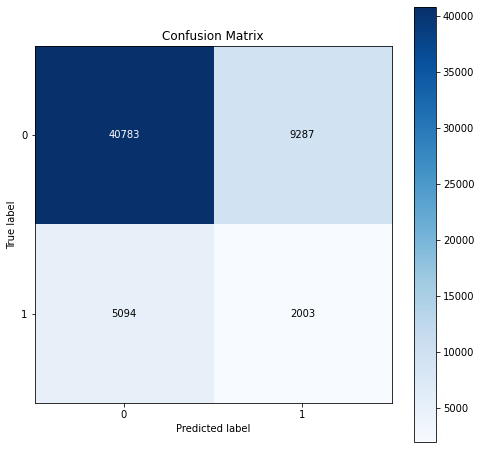

In [ ]:
print('ROC AUC score for KNN with over-sampling: %.4f'%knn_score_u)
print('F1 score: %0.4f'%f1_score(y_valid, knn_class_u))
skplt.metrics.plot_confusion_matrix(y_valid, knn_class_u,
        figsize=(8,8))

3. Naive Baye's

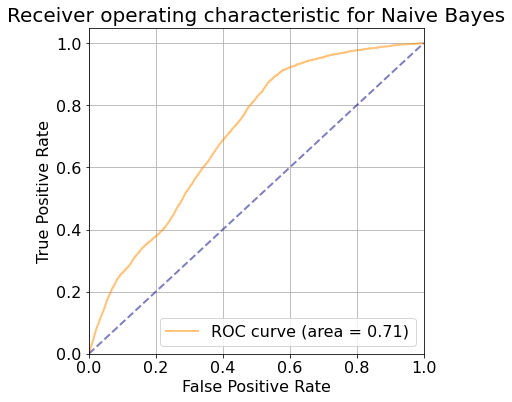

In [ ]:
nb_preds_u = nb.predict_proba(X_valid)
nb_score_u = roc_auc_score(y_valid, nb_preds_u[:,1])
nb_class_u = nb.predict(X_valid)

(fpr, tpr, thresholds) = roc_curve(y_valid, nb_preds_u[:,1])
plot_ROC(fpr, tpr,'Naive Bayes')

ROC AUC score for Naive Bayes with over-sampling: 0.7058
F1 score: 0.2647


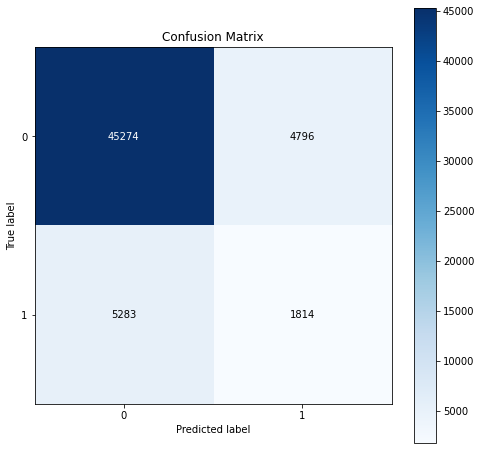

In [ ]:
print('ROC AUC score for Naive Bayes with over-sampling: %.4f'%nb_score_u)
print('F1 score: %0.4f'%f1_score(y_valid, nb_class_u))
skplt.metrics.plot_confusion_matrix(y_valid, nb_class_u,
        figsize=(8,8))

4. Decision Tree Model

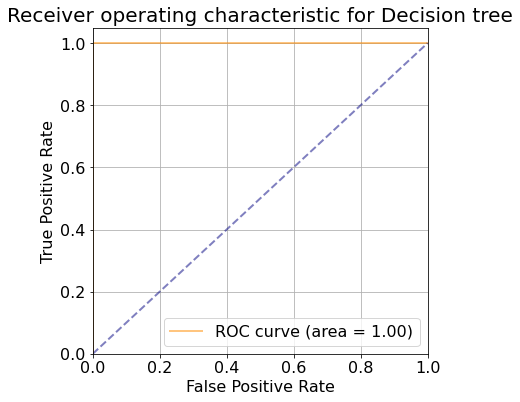

In [ ]:
dtree_preds_u = dtree.predict_proba(X_valid)
dtree_score_u = roc_auc_score(y_valid, dtree_preds_u[:,1])
dtree_class_u = dtree.predict(X_valid)

(fpr, tpr, thresholds) = roc_curve(y_valid, dtree_preds_u[:,1])
plot_ROC(fpr, tpr,'Decision tree')

ROC AUC score for Decision Tree with over-sampling: 1.0000
F1 score: 1.0000


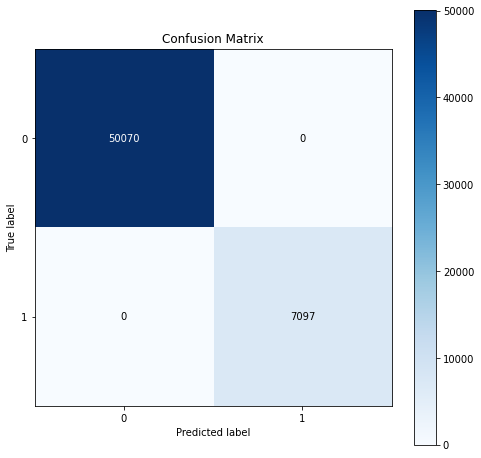

In [ ]:
print('ROC AUC score for Decision Tree with over-sampling: %.4f'%dtree_score_u)
print('F1 score: %0.4f'%f1_score(y_valid, dtree_class_u))
skplt.metrics.plot_confusion_matrix(y_valid, dtree_class_u,
        figsize=(8,8))

5. Support Vector Machines

In [ ]:
"""svm_preds_u = svm.predict_proba(X_valid)
svm_score_u = roc_auc_score(y_valid, svm_preds_u[:,1])
svm_class_u = svm.predict(X_valid)
(fpr, tpr, thresholds) = roc_curve(y_valid, svm_preds_u[:,1])
plot_ROC(fpr, tpr,'SVM')"""

"svm_preds_u = svm.predict_proba(X_valid)\nsvm_score_u = roc_auc_score(y_valid, svm_preds_u[:,1])\nsvm_class_u = svm.predict(X_valid)\n\n(fpr, tpr, thresholds) = roc_curve(y_valid, svm_preds_u[:,1])\nplot_ROC(fpr, tpr,'SVM')"

6. Random Forest

ROC AUC score for RandomForest model with over-sampling: 0.9111
Optimized RF f1-score 0.5429119590705607


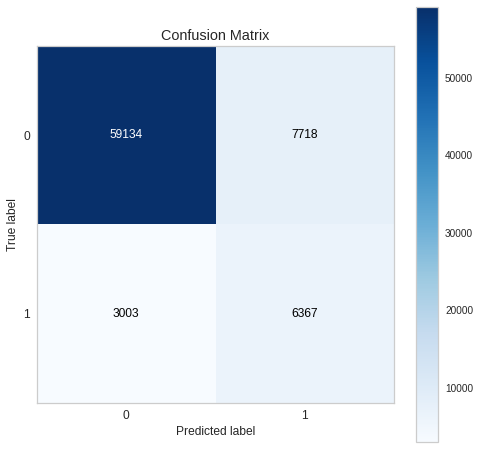

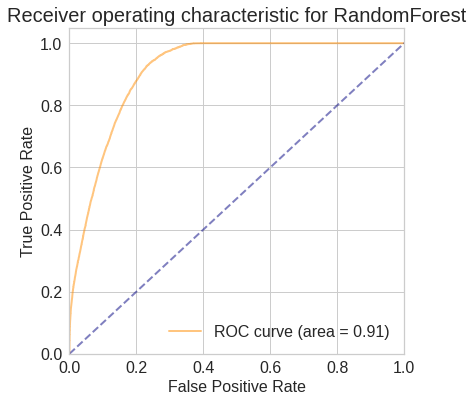

In [ ]:
rfm_preds_u = rfm.predict_proba(X_valid)
rfm_score_u = roc_auc_score(y_valid, rfm_preds_u[:,1])
rfm_class_u = rfm.predict(X_valid)

print('ROC AUC score for Decision Tree with over-sampling: %.4f'%rfm_score_u)
print('F1 score: %0.4f'%f1_score(y_valid, rfm_class_u))
skplt.metrics.plot_confusion_matrix(y_valid, rfm_class_u,
        figsize=(8,8))

(fpr, tpr, thresholds) = roc_curve(y_valid, rfm_preds_u[:,1])
plot_ROC(fpr, tpr,'Random Forest')

7.  gradient boosted decision trees 

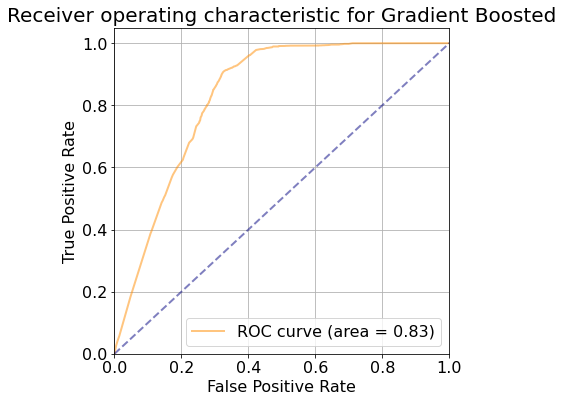

In [ ]:
gb_preds_u = gb.predict_proba(X_test)
gb_score_u = roc_auc_score(Y_test, gb_preds_u[:,1])
gb_class_u = gb.predict(X_test)

(fpr, tpr, thresholds) = roc_curve(Y_test, gb_preds_u[:,1])
plot_ROC(fpr, tpr,'Gradient Boosted')